# **Análisis Geográfico de las sucursales OXXO en la Ciudad de México**

**Fuente de información**: [OXXO Tiendas](https://www.afirme.com/Contenido/files/Banco/OXXO_TIENDAS.pdf)

---

In [ ]:
!pip3 install geopandas
!pip3 install tabula-py

In [2]:
import pandas as pd               # Data manipulation
import numpy as np                # Numerical python
import matplotlib.pyplot as plt   # Data visualization
import geopandas as gpd           # Geospacial data manipulation
import tabula                     # Library for PDF data extaction
from PIL import Image             # Image manipulation
import warnings                   # Warnings util

warnings.filterwarnings('ignore') # Ignore filter warnings

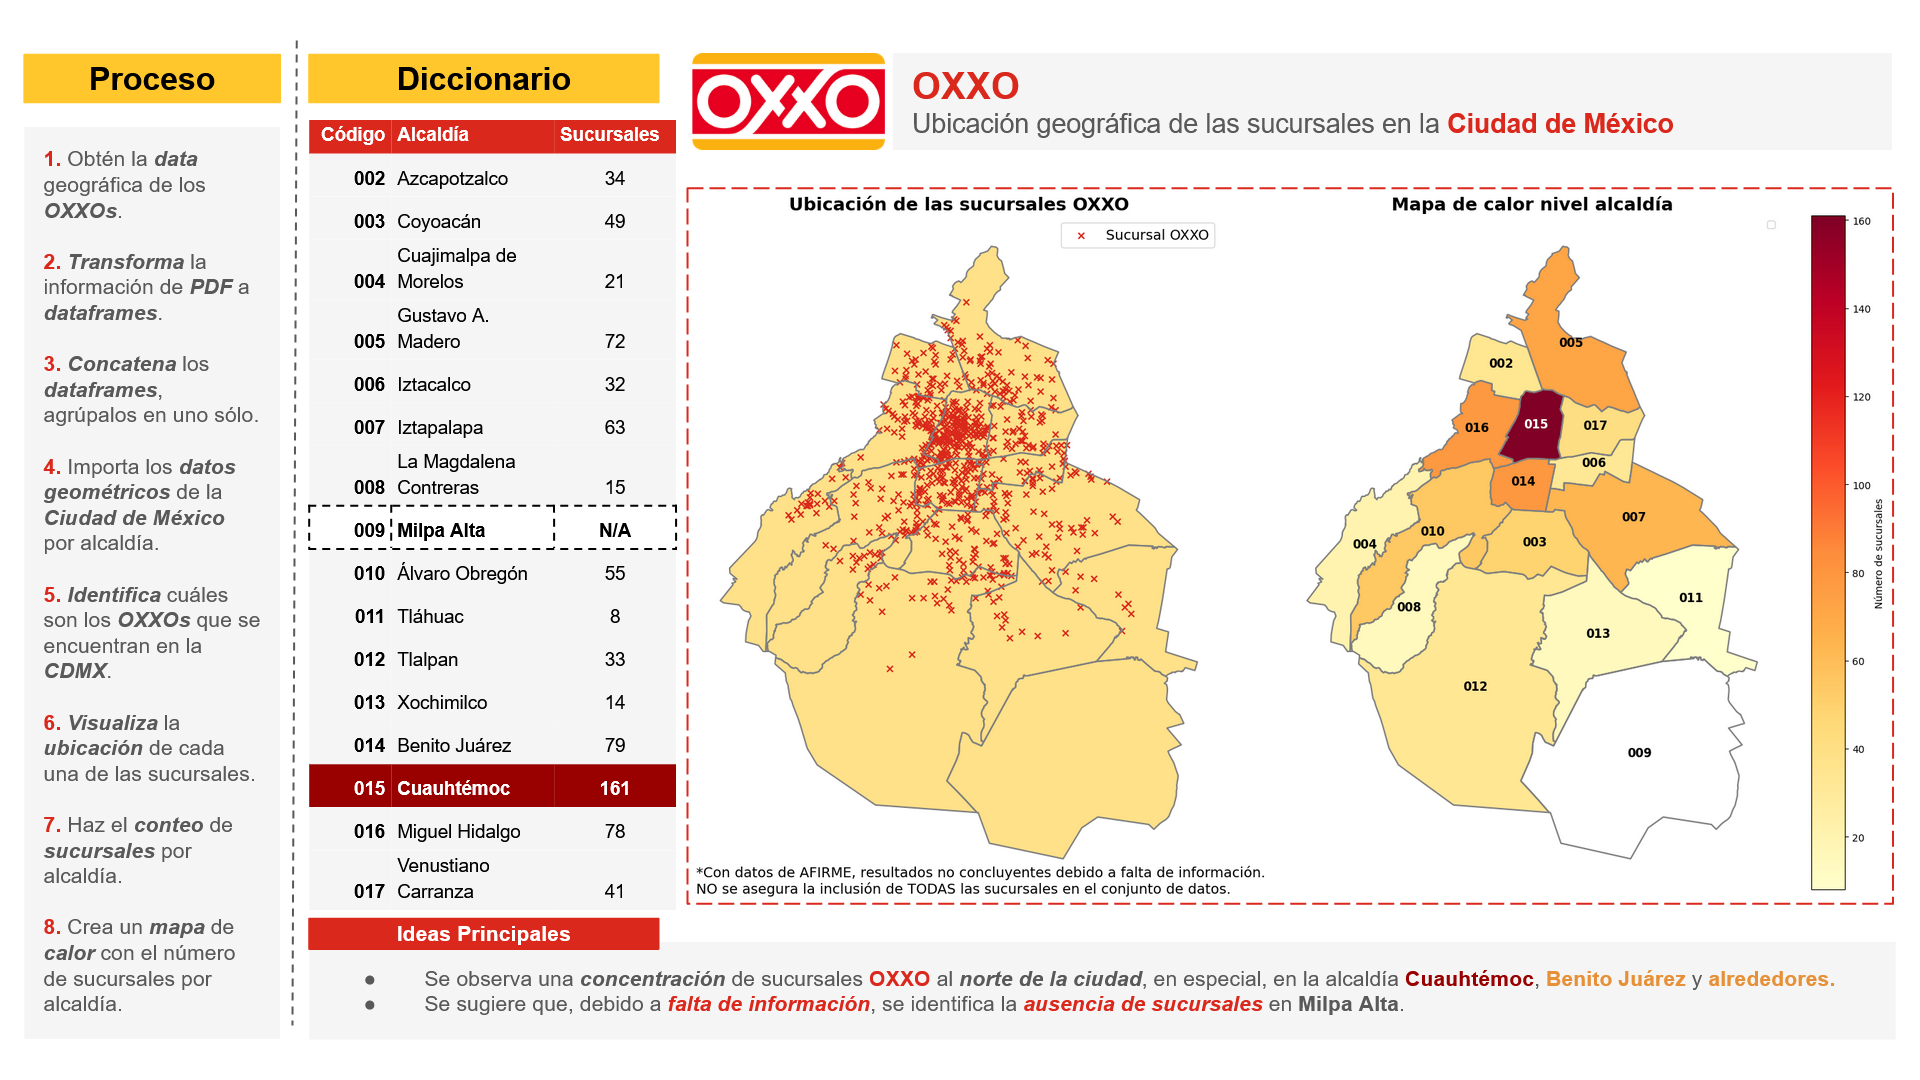

In [3]:
# Abre el onepager FINAL
Image.open("data/onepager_OXXO.png")

In [ ]:
# Lee las tablas dentro del pdf
tables = tabula.read_pdf("data/OXXO_TIENDAS.pdf", pages = "all", pandas_options = {"header": None})

In [6]:
# Concatena toda la info de los datos en un mismo dataframe
oxxos = pd.concat(tables[1:])

# Columans de interes (sin NAN)
oxxos_cols = list(set(oxxos.columns).difference(set([5, 13, 15, 16, 17])))

# Selecciona solo las columnas de ineteresb
oxxos = oxxos[oxxos_cols]

# Genera una lista con las columnas de las tablas
oxxo_cols = ["NOMBRE_PLAZA", "NOMBRE_TIENDA", "EMPRESA_PERTENECE", "CALLE",
             "NUMERO & ENTRE_CALLES", "CODIGO", "FRANJA FRONTERIZA",
             "COLONIA", "MUNICIPIO_DELEGACION", "CIUDAD", "ESTADO", "LATITUD",
             "LONGITUD"]

# Cambia el nombre de las columnas
oxxos.columns = oxxo_cols

# Imprime la estructura
print(oxxos.info(), "\n")

# Imprime el dataframe
oxxos.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4030 entries, 0 to 129
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NOMBRE_PLAZA           4030 non-null   object 
 1   NOMBRE_TIENDA          4030 non-null   object 
 2   EMPRESA_PERTENECE      4030 non-null   object 
 3   CALLE                  3900 non-null   object 
 4   NUMERO & ENTRE_CALLES  1541 non-null   object 
 5   CODIGO                 3900 non-null   object 
 6   FRANJA FRONTERIZA      4030 non-null   object 
 7   COLONIA                4030 non-null   object 
 8   MUNICIPIO_DELEGACION   4029 non-null   object 
 9   CIUDAD                 3616 non-null   object 
 10  ESTADO                 1542 non-null   float64
 11  LATITUD                1343 non-null   object 
 12  LONGITUD               38 non-null     float64
dtypes: float64(2), object(11)
memory usage: 440.8+ KB
None 



,NOMBRE_PLAZA,NOMBRE_TIENDA,EMPRESA_PERTENECE,CALLE,NUMERO & ENTRE_CALLES,CODIGO,FRANJA FRONTERIZA,COLONIA,MUNICIPIO_DELEGACION,CIUDAD,ESTADO,LATITUD,LONGITUD
0,Mexico,Valenciana MEX,CADENA COMERCIAL OXXO SA. DE JCoVs.é María Parras,300 Gral. Fco. Leyva y Gral. F.Arce.,NaN,N,JUAN ESCUTIA,IZTAPALAPA,CIUDAD DE MEXICO CIUDAD DE MEXICO,19.390532,NaN,NaN,NaN
1,Laguna,SAN IGNACIO TRC,CADENA COMERCIAL OXXO SA. DE SCaVn. Ignacio,704 Calzada la salle y san Ignacio,NaN,N,JERUSALEN,GOMEZ PALACIO,GOMEZ PALACIO DURANGO,25.557559,NaN,NaN,NaN
2,Laguna,Valle de Chapala TRC,CADENA COMERCIAL OXXO SA. DE ACV. CENTRAL,317 CALLE DURANGO Y CALLE GUANAJUATO,NaN,N,CHAPALA ORIENTE,GOMEZ PALACIO,GOMEZ PALACIO DURANGO,25.581795,NaN,NaN,NaN
3,Chihuahua,Lealtad CUF,CADENA COMERCIAL OXXO SA. DE ACvV.. Solidarida...,1000 Av. Solidaridad y Canal,NaN,N,OBRERA,DELICIAS,CIUDAD DELICIAS CHIHUAHUA,28.204401,NaN,NaN,NaN
4,Ciudad Juarez,La Cuesta CJS,CADENA COMERCIAL OXXO SA. DE CAVR. R. JUAREZ C...,6120 CORDILLERA DE LOS ANDES Y CARR. JUAREZ CA...,NaN,S,LA CUESTA 1,JUAREZ,CIUDAD JUAREZ CHIHUAHUA,31.675808,NaN,NaN,NaN


In [7]:
# Selecciona solo los datos sin NAN
oxxos = oxxos.dropna().astype({"LONGITUD":"float64", "LATITUD":"float64"})

# Genera un geodataframe
oxxos = gpd.GeoDataFrame(oxxos)

# Imprime la estructura del dataframe
print(oxxos.info(), "\n")

# Genera los points
oxxos["ubicacion"] = gpd.points_from_xy(oxxos["LONGITUD"], oxxos["LATITUD"])

# Imprime el head
oxxos.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 0 entries
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NOMBRE_PLAZA           0 non-null      object 
 1   NOMBRE_TIENDA          0 non-null      object 
 2   EMPRESA_PERTENECE      0 non-null      object 
 3   CALLE                  0 non-null      object 
 4   NUMERO & ENTRE_CALLES  0 non-null      object 
 5   CODIGO                 0 non-null      object 
 6   FRANJA FRONTERIZA      0 non-null      object 
 7   COLONIA                0 non-null      object 
 8   MUNICIPIO_DELEGACION   0 non-null      object 
 9   CIUDAD                 0 non-null      object 
 10  ESTADO                 0 non-null      float64
 11  LATITUD                0 non-null      float64
 12  LONGITUD               0 non-null      float64
dtypes: float64(3), object(10)
memory usage: 0.0+ bytes
None 



,NOMBRE_PLAZA,NOMBRE_TIENDA,EMPRESA_PERTENECE,CALLE,NUMERO & ENTRE_CALLES,CODIGO,FRANJA FRONTERIZA,COLONIA,MUNICIPIO_DELEGACION,CIUDAD,ESTADO,LATITUD,LONGITUD,ubicacion


In [9]:
# Importa los datos con los limites de las alcaldias
cdmx = gpd.read_file("data/CDMX_mpal.geojson") # Debido al tamaño del archivo, este no se encuentra en el repositorio

# Pon el geometry
cdmx.set_geometry("geometry", inplace = True)

# Calcula el centroid
cdmx["centroid"] = cdmx.centroid

# Imprime los datos
cdmx

,CVE_ENT,CVE_MUN,NOM_MUN,OID_1,cov_,cov_id,geometry,centroid
0,09,002,Azcapotzalco,337,337,338,"POLYGON ((-99.18245 19.50756, -99.18231 19.507...",POINT (-99.18211 19.48533)
1,09,005,Gustavo A. Madero,338,338,339,"POLYGON ((-99.11789 19.59059, -99.11860 19.584...",POINT (-99.11586 19.50407)
2,09,016,Miguel Hidalgo,339,339,340,"POLYGON ((-99.19044 19.47046, -99.19058 19.467...",POINT (-99.20457 19.42806)
3,09,006,Iztacalco,340,340,341,"POLYGON ((-99.05579 19.42214, -99.05584 19.421...",POINT (-99.09433 19.39691)
4,09,017,Venustiano Carranza,341,341,342,"POLYGON ((-99.10946 19.45292, -99.10895 19.452...",POINT (-99.09311 19.43050)
5,09,007,Iztapalapa,342,342,343,"POLYGON ((-99.05813 19.40072, -99.05814 19.400...",POINT (-99.05680 19.34917)
6,09,012,Tlalpan,2448,2448,2449,"POLYGON ((-99.19671 19.30240, -99.19629 19.302...",POINT (-99.20622 19.19834)
7,09,013,Xochimilco,2449,2449,2450,"POLYGON ((-99.09880 19.32045, -99.09870 19.319...",POINT (-99.09036 19.24515)
8,09,008,La Magdalena Contreras,2450,2450,2451,"POLYGON ((-99.20819 19.33674, -99.20859 19.336...",POINT (-99.26841 19.26898)
9,09,014,Benito Juárez,2451,2451,2452,"POLYGON ((-99.13659 19.40281, -99.13679 19.401...",POINT (-99.16113 19.38064)


In [10]:
# La union de la geometria de todas las alcaldias
cdmx_boundary = cdmx["geometry"].unary_union

In [11]:
# Crea un nuevo dataframe SOLO con los oxxos dentro de la ciudad
oxxos_cdmx = oxxos[oxxos["ubicacion"].within(cdmx_boundary) == True].set_geometry("ubicacion")

# Imprime el dataframe
oxxos_cdmx

,NOMBRE_PLAZA,NOMBRE_TIENDA,EMPRESA_PERTENECE,CALLE,NUMERO & ENTRE_CALLES,CODIGO,FRANJA FRONTERIZA,COLONIA,MUNICIPIO_DELEGACION,CIUDAD,ESTADO,LATITUD,LONGITUD,ubicacion


In [12]:
def ubica_alcaldia(ubicacion):

  # Define alcaldia con un valor None al inicio
  alcaldia = None

  # Para cada uno de los registros de las alcaldias identifica si el punto esta dentro
  # del poligono
  for i in range(cdmx.shape[0]):

    # Identifica el i record dentro de cdmx
    cdmx_record = cdmx.iloc[i]

    # Identifica si el punto esta dentro del poligono de la alcaldia
    if ubicacion.within(cdmx_record["geometry"]):
      alcaldia = cdmx_record["NOM_MUN"]
      break
  
  return alcaldia

In [13]:
# Ubica la alcaldia con los mismos valores que el dataframe de cdmx
oxxos_cdmx["alcaldia_cdmx"] = oxxos_cdmx["ubicacion"].apply(ubica_alcaldia)

# Imprime el head
oxxos_cdmx.head()

,NOMBRE_PLAZA,NOMBRE_TIENDA,EMPRESA_PERTENECE,CALLE,NUMERO & ENTRE_CALLES,CODIGO,FRANJA FRONTERIZA,COLONIA,MUNICIPIO_DELEGACION,CIUDAD,ESTADO,LATITUD,LONGITUD,ubicacion,alcaldia_cdmx


In [14]:
# Crea un nuevo dataframe con los value_counts de oxxos
cdmx_agg = pd.merge(cdmx, oxxos_cdmx["alcaldia_cdmx"].value_counts(), left_on="NOM_MUN", right_index = True, how = "outer")

# Computa el centroide de la alcaldia
cdmx_agg["centroid"] = cdmx_agg["geometry"].centroid

# Muestra el dtaframe
cdmx_agg

,CVE_ENT,CVE_MUN,NOM_MUN,OID_1,cov_,cov_id,geometry,centroid,alcaldia_cdmx
0,09,002,Azcapotzalco,337,337,338,"POLYGON ((-99.18245 19.50756, -99.18231 19.507...",POINT (-99.18211 19.48533),NaN
1,09,005,Gustavo A. Madero,338,338,339,"POLYGON ((-99.11789 19.59059, -99.11860 19.584...",POINT (-99.11586 19.50407),NaN
2,09,016,Miguel Hidalgo,339,339,340,"POLYGON ((-99.19044 19.47046, -99.19058 19.467...",POINT (-99.20457 19.42806),NaN
3,09,006,Iztacalco,340,340,341,"POLYGON ((-99.05579 19.42214, -99.05584 19.421...",POINT (-99.09433 19.39691),NaN
4,09,017,Venustiano Carranza,341,341,342,"POLYGON ((-99.10946 19.45292, -99.10895 19.452...",POINT (-99.09311 19.43050),NaN
5,09,007,Iztapalapa,342,342,343,"POLYGON ((-99.05813 19.40072, -99.05814 19.400...",POINT (-99.05680 19.34917),NaN
6,09,012,Tlalpan,2448,2448,2449,"POLYGON ((-99.19671 19.30240, -99.19629 19.302...",POINT (-99.20622 19.19834),NaN
7,09,013,Xochimilco,2449,2449,2450,"POLYGON ((-99.09880 19.32045, -99.09870 19.319...",POINT (-99.09036 19.24515),NaN
8,09,008,La Magdalena Contreras,2450,2450,2451,"POLYGON ((-99.20819 19.33674, -99.20859 19.336...",POINT (-99.26841 19.26898),NaN
9,09,014,Benito Juárez,2451,2451,2452,"POLYGON ((-99.13659 19.40281, -99.13679 19.401...",POINT (-99.16113 19.38064),NaN


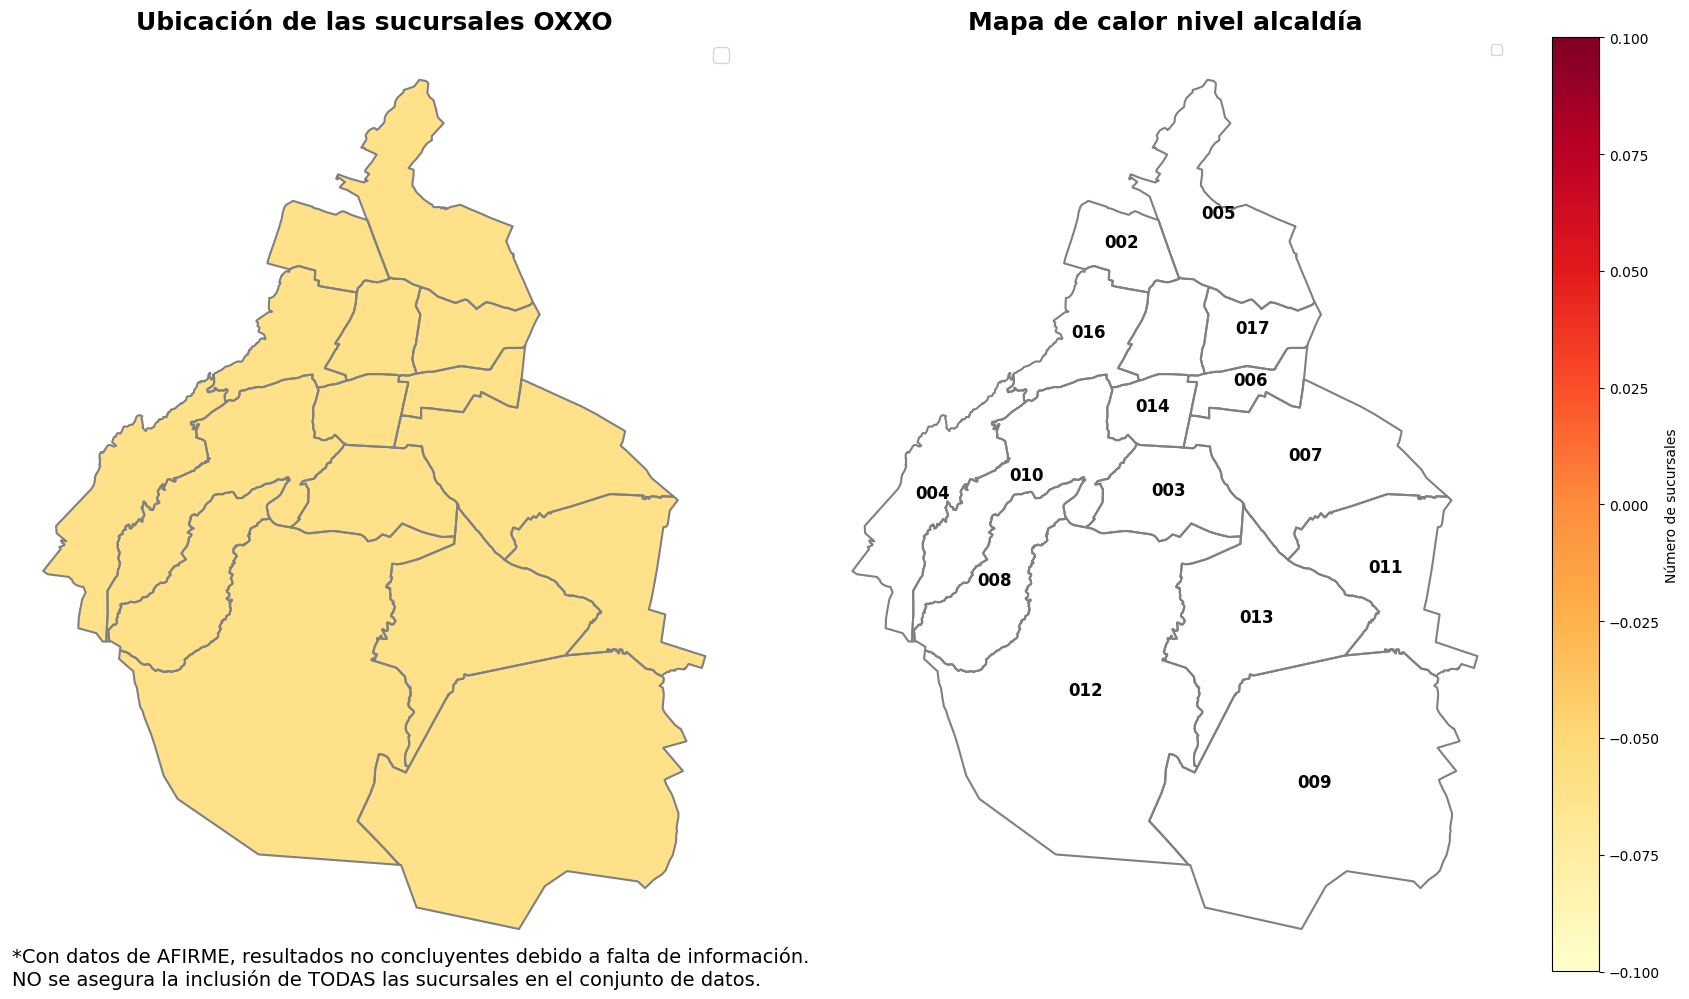

In [15]:
plt.figure(figsize = (18, 10))

# Colores
rojo_oxxo = "#da291c"
amarillo_oxxo = "#ffc72c"

# Eje izquierdo
ax_l = plt.subplot(1, 2, 1)

# Grafica los limites de la alcaldia
cdmx_agg["geometry"].boundary.plot(color = "gray", ax = ax_l, linewidth = 1.5)
# Grafica el relleno de las alcaldias
cdmx_agg["geometry"].plot(color = "#ffe189", ax = ax_l)
# Grafica cada uno de los oxxos
oxxos_cdmx.plot(color = rojo_oxxo, ax = ax_l, marker = "x", label = "Sucursal OXXO")
# Agrega un legend para conocer el significado de "x"
ax_l.legend(fontsize = 14)

# Agrega un titulo para la imagen de la izquierda
ax_l.set_title("Ubicación de las sucursales OXXO", weight = "bold", size = 18)

# Eje derecho
ax_r = plt.subplot(1, 2, 2)

# Grafica los limites de la alcaldia
cdmx_agg["geometry"].boundary.plot(color = "gray", linewidth = 1.5, ax = ax_r)
# GRafica el numero de oxxos por alcaldia
cdmx_agg.plot("alcaldia_cdmx", cmap = "YlOrRd", ax = ax_r, legend = True,
              legend_kwds = {"label": "Número de sucursales"}, label = "alcaldia_cdmx")


# Ponle un titulo a la grafica
ax_r.set_title("Mapa de calor nivel alcaldía", weight = "bold", size = 18)


for i in range(cdmx.shape[0]):
  # Identifica el registro actual
  cur_record = cdmx_agg.iloc[i]
  cur_centroid = cur_record["centroid"]
  cur_alcaldia = cur_record["NOM_MUN"]
  cur_cve = cur_record["CVE_MUN"]

  # Identifica si se habla de Cuahtmetoc (el color mas oscuro)
  if cur_cve == "015":
    color = "white"
  else:
    color = "black"

  # Anotalo en la grafica
  ax_r.annotate(
      cur_cve,
      (cur_centroid.x, cur_centroid.y),
      ha = "center",
      color = color,
      weight = "bold",
      size = 12
  )

ax_r.legend()

# Apaga los axis de las graficas
ax_r.axis("off")
ax_l.axis("off")

# Agrega un texto abajo
plt.gcf().text(0.05, 0.01, "*Con datos de AFIRME, resultados no concluyentes debido a falta de información.\nNO se asegura la inclusión de TODAS las sucursales en el conjunto de datos.",
               size = 14)

# Comprime los datos
plt.tight_layout()